### Question: how many newborns are to be expected for 2016 and 2017 ?

In [1]:
# setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

# import package Starts
from Starts.startmodskl import *
from Starts.startvis import *
%matplotlib inline
rcParams['figure.figsize'] = 15, 6
newborn_1950_2015 = pd.read_csv('./data/newborn_1950_2015.csv')
newborn_1950_2015.set_index('Jahr', inplace=True)

local_kwargs {'data_path': './data/marriages_1950_2015.csv, ./data/marriages_groupby_age2015.csv, ./data/marriages_groupby_de_1994_2015.csv', 'drop_obj_col': False, 'nan_drop_col': False, 'nan_drop_row': False, 'nan_zero': False, 'nan_mean': True, 'nan_mean_neighbors': False}


In [2]:
newborn_1950_2015.head()

,männlich,weiblich,Insgesamt
Jahr,,,
1950,578191.0,538510.0,1116701.0
1951,571699.0,534681.0,1106380.0
1952,571152.0,533932.0,1105084.0
1953,564929.0,530100.0,1095029.0
1954,572559.0,537184.0,1109743.0


### 1. Linear Regression

In [3]:
# from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = newborn_1950_2015['Insgesamt'].values

/usr/local/lib64/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
len(X[0:len(X)-5])+ len(X[len(X)-5:])
X[1:len(X)-5]

array([ 1106380.,  1105084.,  1095029.,  1109743.,  1113408.,  1137169.,
        1165555.,  1175870.,  1243922.,  1261614.,  1313505.,  1316534.,
        1355595.,  1357304.,  1325386.,  1318303.,  1272276.,  1214968.,
        1142366.,  1047737.,  1013396.,   901657.,   815969.,   805500.,
         782310.,   798334.,   805496.,   808619.,   817217.,   865789.,
         862100.,   861275.,   827933.,   812292.,   813803.,   848232.,
         867969.,   892993.,   880459.,   905675.,   830019.,   809114.,
         798447.,   769603.,   765221.,   796013.,   812173.,   785034.,
         770744.,   766999.,   734475.,   719250.,   706721.,   705622.,
         685795.,   672724.,   684862.,   682514.,   665126.,   677947.])

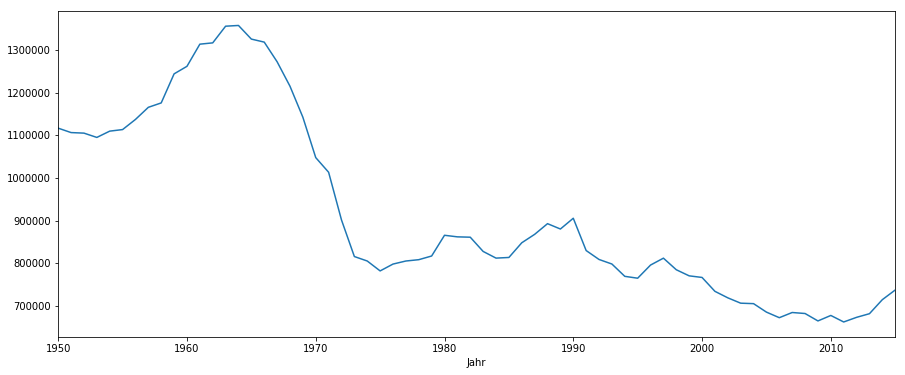

In [5]:
newborn_1950_2015['Insgesamt'].plot()

In [6]:
# from sklearn.linear_model import LinearRegression
# reg_lin = LinearRegression()
X_train = newborn_1950_2015['Insgesamt'].index
y_train = newborn_1950_2015['Insgesamt'].values
# reg_lin.fit(X_train.values.reshape(-1,1), y_train)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train.values.reshape(-1,1))
poly_reg.fit(X_poly, y_train)
reg_lin = LinearRegression()
reg_lin.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
X_test_true = newborn_1950_2015['Insgesamt'].index[60:66]
y_true = newborn_1950_2015['Insgesamt'].values[60:66]
X_test_true, y_true

(Int64Index([2010, 2011, 2012, 2013, 2014, 2015], dtype='int64', name='Jahr'),
 array([ 677947.,  662685.,  673544.,  682069.,  714927.,  737575.]))

In [9]:
y_pred_lin = reg_lin.predict(poly_reg.fit_transform(X_test_true.values.reshape(-1,1)))
y_pred_lin, y_true

(array([ 699615.7053833 ,  705898.41531372,  713552.45895386,
         722621.60708618,  733149.63064575,  745180.30044556]),
 array([ 677947.,  662685.,  673544.,  682069.,  714927.,  737575.]))

In [10]:
print(mean_squared_error(y_true, y_pred_lin))


995337941.322


In [11]:
# predict in year 2016, 2017
X_pred = np.array([[2016], [2017]])
y_pred = reg_lin.predict(poly_reg.fit_transform(X_pred))
y_pred

array([ 758757.38742065,  773924.66235352])

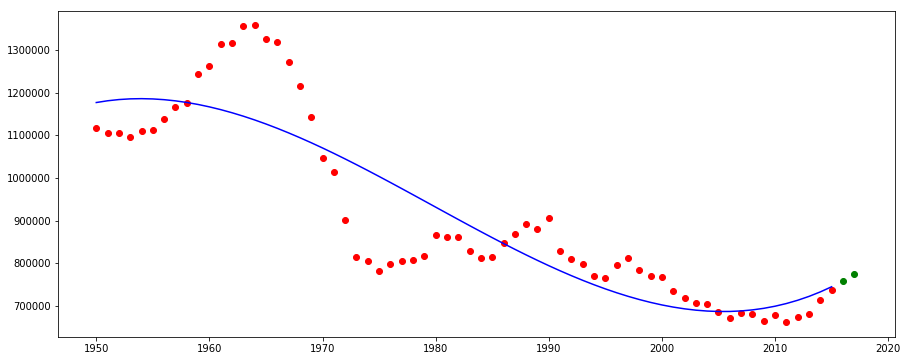

In [12]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

### 2. Decision Tree Regression

In [13]:
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(X_train.values.reshape(-1,1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [14]:
y_pred_dt = reg_dt.predict(X_test_true.values.reshape(-1,1))
y_pred_dt, y_true

(array([ 677947.,  662685.,  673544.,  682069.,  714927.,  737575.]),
 array([ 677947.,  662685.,  673544.,  682069.,  714927.,  737575.]))

In [15]:
print(mean_squared_error(y_true, y_pred_dt))  # Overfitting ?

0.0


In [16]:
# Result
y_pred2 = reg_dt.predict(X_pred)
y_pred2

array([ 737575.,  737575.])

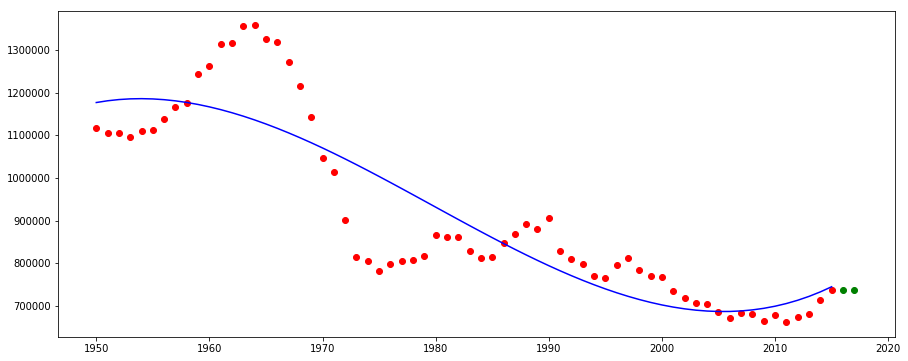

In [17]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred2, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

### 3. Random Forest

In [18]:
reg_rf = RandomForestRegressor(n_estimators=10, random_state=0)
reg_rf.fit(X_train.values.reshape(-1,1), y_train)
reg_rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
y_pred_rf = reg_rf.predict(X_test_true.values.reshape(-1,1))
y_pred_rf, y_true

(array([ 675382.8,  669875.7,  671138.8,  684502.3,  705069.6,  719679.4]),
 array([ 677947.,  662685.,  673544.,  682069.,  714927.,  737575.]))

In [20]:
print(mean_squared_error(y_true, y_pred_rf))  # error too large

81234676.3633


In [21]:
# Result and comparing with the above results
y_pred3 = reg_rf.predict(X_pred)
y_pred3, y_pred2, y_pred

(array([ 719679.4,  719679.4]),
 array([ 737575.,  737575.]),
 array([ 758757.38742065,  773924.66235352]))

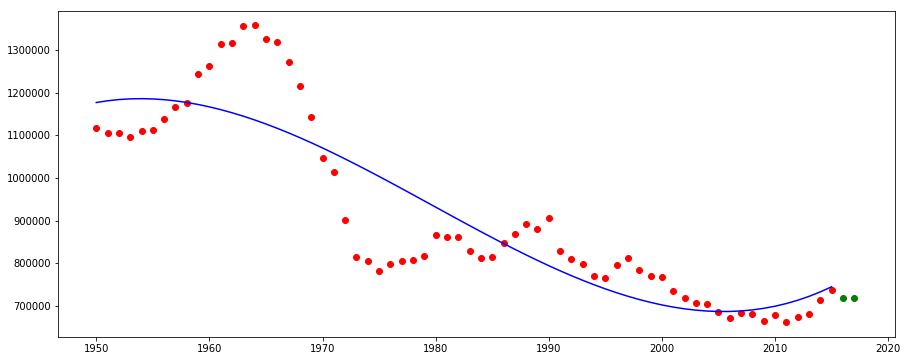

In [22]:
# Visual
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred3, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

### Final Result by computing the mean value of all 3 above results 

### (linear regression, decision tree, random forest)

In [23]:
y_pred_mean_2016 = np.mean([y_pred3[0], y_pred2[0], y_pred[0]])
y_pred_mean_2017 = np.mean([y_pred3[1], y_pred2[1], y_pred[1]])
y_pred_final = [y_pred_mean_2016, y_pred_mean_2017]
y_pred_final

[738670.5958068847, 743726.35411783855]

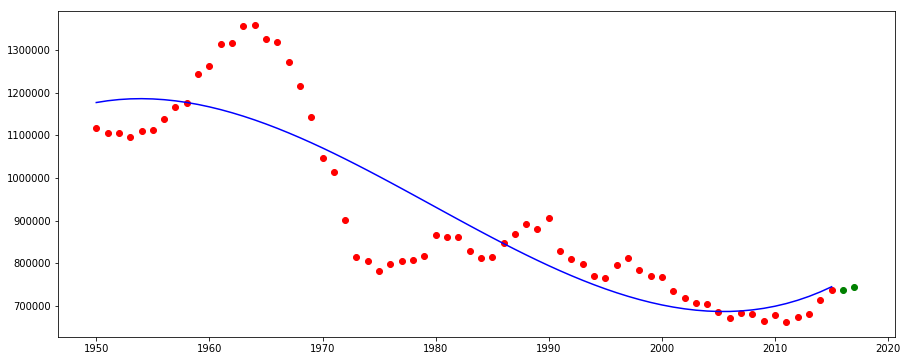

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_pred, y_pred_final, color='green')
plt.plot(X_train.values, reg_lin.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color = 'blue')

In [25]:
# StartMod.validation(reg_lin, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_dt, X_train.values.reshape(-1,1), y_train)
# StartMod.validation(reg_rf, X_train.values.reshape(-1,1), y_train)